In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from l_utils import plt_show_bgr

cv2.__version__

'4.6.0'

In [4]:
img_cd = cv2.imread('../img/catdog.jpg', cv2.IMREAD_COLOR)
img_cd_gray = cv2.imread('../img/catdog.jpg', cv2.IMREAD_GRAYSCALE)
img_cat = cv2.imread('../img/cat2.jpg', cv2.IMREAD_COLOR)
img_cat_gray = cv2.imread('../img/cat2.jpg', cv2.IMREAD_GRAYSCALE)

img_fliter = cv2.imread('../img/mean_fliter.png')

## 读取显示BGR图片

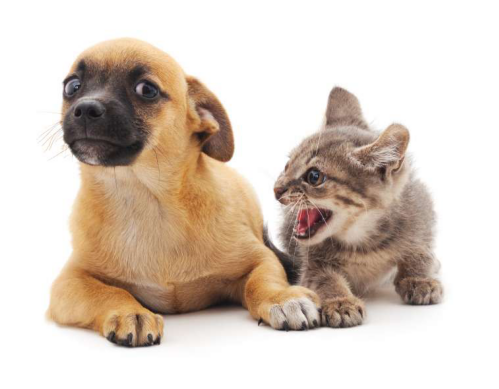

In [5]:
plt_show_bgr(img_cd)

## 显示灰度图

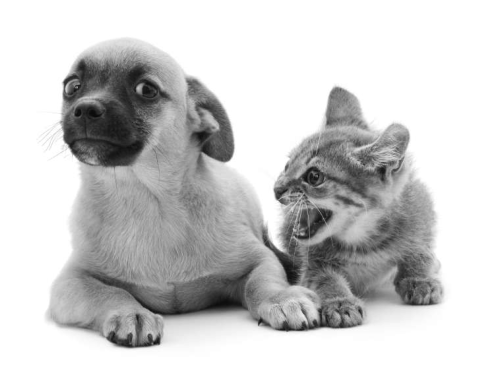

In [6]:

plt.axis('off')
plt.imshow(img_cd_gray, cmap='gray');

## ROI 显示， 通道分离和合并

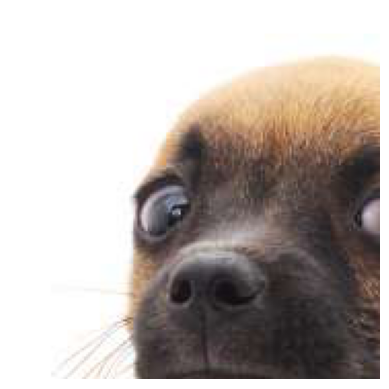

In [9]:
plt_show_bgr(img_cd[20:200, 20:200])

In [7]:
b, g, r = cv2.split(img_cd)
img_cd.shape, b.shape, g.shape, r.shape

((561, 728, 3), (561, 728), (561, 728), (561, 728))

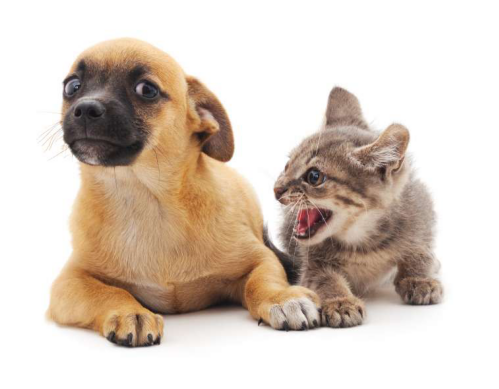

In [8]:
rgb = cv2.merge((r, g, b))
plt.axis('off')
plt.imshow(rgb);

## 边界填充

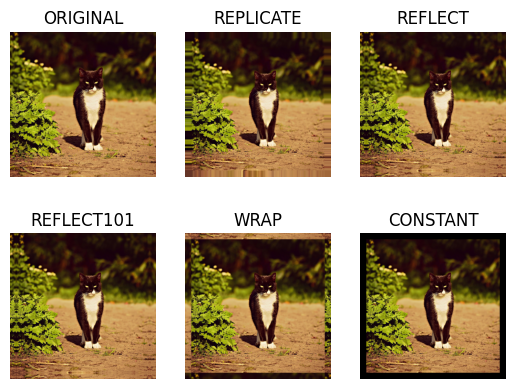

In [9]:
img = img_cat[..., ::-1]

# top_size, bottom_size, left_size, right_size = (60, 60, 60, 60)
pad_sizes = (60, 60, 60, 60)
replicate = cv2.copyMakeBorder(img, *pad_sizes, borderType=cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, *pad_sizes, borderType=cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img, *pad_sizes, borderType=cv2.BORDER_REFLECT101)
wrap = cv2.copyMakeBorder(img, *pad_sizes, borderType=cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, *pad_sizes, borderType=cv2.BORDER_CONSTANT)
plt.subplot(231), plt.axis('off'), plt.imshow(img), plt.title('ORIGINAL')
plt.subplot(232), plt.axis('off'), plt.imshow(replicate), plt.title('REPLICATE')
plt.subplot(233), plt.axis('off'), plt.imshow(reflect), plt.title('REFLECT')
plt.subplot(234), plt.axis('off'), plt.imshow(reflect101), plt.title('REFLECT101')
plt.subplot(235), plt.axis('off'), plt.imshow(wrap), plt.title('WRAP')
plt.subplot(236), plt.axis('off'), plt.imshow(constant), plt.title('CONSTANT')
plt.show()

## 图像阈值
![](img/threshold.jpg)

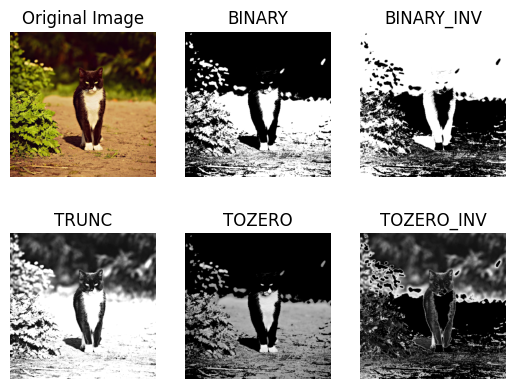

In [10]:
ret, thresh1 = cv2.threshold(img_cat_gray, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img_cat_gray, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img_cat_gray, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img_cat_gray, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img_cat_gray, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(len(titles)):
	plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
	plt.title(titles[i])
	plt.xticks([]), plt.yticks([])
	plt.axis('off')
plt.show()


## 图像卷积(cv2.filter2D)
[Opencv之图像滤波：1.图像卷积（cv2.filter2D](https://blog.csdn.net/qq_49478668/article/details/123169357)

在OpenCV中，允许用户自定义卷积核实现卷积操作，使用自定义卷积核实现卷积操作的函数是cv2.filter2D（），其语法格式为：

dst=cv2.filter2D（src,ddepth,kernel,anchor,delta,borderType）

式中：

* dst是返回值，表示进行方框滤波后得到的处理结果。

* src 是需要处理的图像，即原始图像。它能够有任意数量的通道，并能对各个通道独立处理。图像深度应该是CV_8U、CV_16U、CV_16S、CV_32F或者CV_64F中的一 种。

* ddepth是处理结果图像的图像深度，一般使用-1表示与原始图像使用相同的图像深度。

* kernel是卷积核，是一个单通道的数组。如果想在处理彩色图像时，让每个通道使用不同的核，则必须将彩色图像分解后使用不同的核完成操作。

* anchor 是锚点，其默认值是（-1,-1），表示当前计算均值的点位于核的中心点位 置。该值使用默认值即可，在特殊情况下可以指定不同的点作为锚点。

* delta 是修正值，它是可选项。如果该值存在，会在基础滤波的结果上加上该值作 为最终的滤波处理结果。

* borderType是边界样式，该值决定了以何种情况处理边界，通常使用默认值即可。

在一般情况下，使用cv.filter2D()时，对于参数锚点anchor，修正值delta，边界样式borderType，直接采用其默认值即可。

因此，cv.filter2D()的常用形式为：

dst=cv2.filter2D（src,ddepth,kernel）

卷积前矩阵为：
 [[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15.]
 [16. 17. 18. 19. 20.]
 [21. 22. 23. 24. 25.]]
卷积后矩阵为：
 [[ 5.         5.3333335  6.3333335  7.333333   7.666667 ]
 [ 6.666667   7.0000005  8.         9.         9.333333 ]
 [11.666667  12.000001  13.        14.        14.333333 ]
 [16.666666  17.        18.        19.        19.333332 ]
 [18.333334  18.666666  19.666668  20.666666  21.       ]]


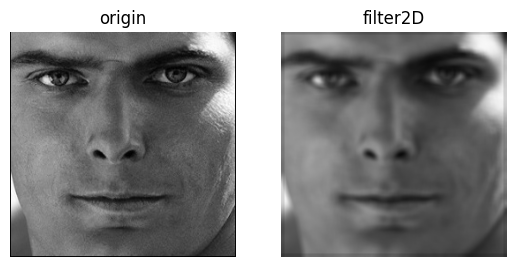

In [12]:
import cv2  as cv
import numpy as np
 
def cv_show(name, img):
    cv.imshow(name, img)
    cv.waitKey(0)
    cv.destroyAllWindows()
 
 
# 卷积操作
src = np.array([[1,2,3,4,5],
                [6,7,8,9,10],
                [11,12,13,14,15],
                [16,17,18,19,20],
                [21,22,23,24,25]],dtype='float32')
kernel1 = np.ones((3,3), dtype='float32')/9
result = cv.filter2D(src, -1,kernel=kernel1)
 
print('卷积前矩阵为：\n {}'.format(src))
print('卷积后矩阵为：\n {}'.format(result))
 
 
# 与图像做卷积操作
if img is None:
    print('Failed to read the imagine')
kernel2 = np.ones((7,7), dtype='float32')/49
result2 = cv.filter2D(img_fliter, -1,kernel=kernel2)
 
plt_show_bgr((img_fliter, result2), ('origin', 'filter2D'))


## 均值滤波
1. [数字图像处理-图像滤波(1)-均值滤波](https://blog.csdn.net/dx199771/article/details/109737605)
2. [Opencv之图像滤波：2.均值滤波(cv2.blur)](https://blog.csdn.net/qq_49478668/article/details/123217030)

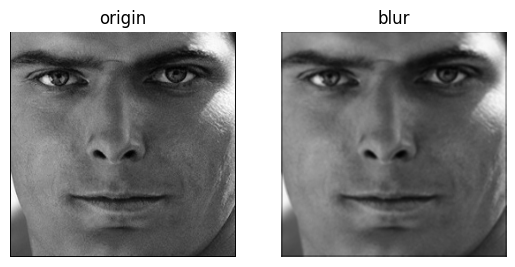

In [13]:
blur = cv2.blur(img_fliter, (3,3))
plt_show_bgr((img_fliter, blur), ('origin', 'blur'))

## 方框滤波
[Opencv之图像滤波：3.方框滤波(cv2.boxFilter)](https://blog.csdn.net/qq_49478668/article/details/123342188)

OpenCV还提供了方框滤波方式，与均值滤波的不同在于，方框滤波不会计算像素均 值。在均值滤波中，滤波结果的像素值是任意一个点的邻域平均值，等于各邻域像素值之 和除以邻域面积。而在方框滤波中，可以自由选择是否对均值滤波的结果进行归一化，即 可以自由选择滤波结果是邻域像素值之和的平均值，还是邻域像素值之和。


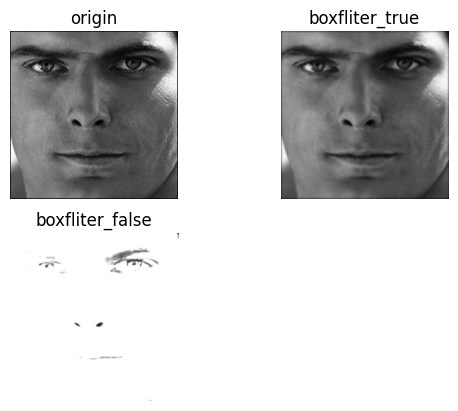

In [14]:
# True: 基本和均值一样，归一化
box1 = cv2.boxFilter(img_fliter, -1, (3,3), normalize=True)
# False: 基本和均值一样，不归一化, 容易越界
box2 = cv2.boxFilter(img_fliter, -1, (3,3), normalize=False)
plt_show_bgr((img_fliter, box1, box2), ('origin', 'boxfliter_true', 'boxfliter_false'))

## 高斯滤波
1. [Opencv之图像滤波：4.高斯滤波(cv2.GaussianBlur)](https://blog.csdn.net/qq_49478668/article/details/123431541)

![](img/gaussian.jpg)

在OpenCV中，实现高斯滤波的函数是cv2.GaussianBlur（），该函数的语法格式是：

dst=cv2.GaussianBlur（src,ksize,sigmaX,sigmaY,borderType）
式中：

● dst是返回值，表示进行高斯滤波后得到的处理结果。  
● src 是需要处理的图像，即原始图像。它能够有任意数量的通道，并能对各个通道 独立处理。图像深度应该是CV_8U、CV_16U、CV_16S、CV_32F 或者 CV_64F中的一 种。  
● ksize 是滤波核的大小。滤波核大小是指在滤波处理过程中其邻域图像的高度和宽 度。需要注意，滤波核的值必须是奇数。  
● sigmaX 是卷积核在水平方向上（X 轴方向）的标准差，其控制的是权重比例。  
● sigmaY是卷积核在垂直方向上（Y轴方向）的标准差。如果将该值设置为0，则只采用sigmaX的值   
	如果sigmaX和sigmaY都是0，则通过ksize.width和ksize.height计算得到。其中：  
	sigmaX=0.3×[（ksize.width-1）×0.5-1] +0.8   
	sigmaY=0.3×[（ksize.height-1）×0.5-1]+0.8        

 ● borderType是边界样式，该值决定了以何种方式处理边界。一般情况下，不需要考虑该值，直接采用默认值即可。 在该函数中，sigmaY和borderType是可选参数。sigmaX是必选参数，但是可以将该参数设置为0，让函数自己去计算sigmaX的具体值。

函数cv2.GaussianBlur（）的常用形式为：  
dst=cv2.GaussianBlur（src,ksize,0,0）

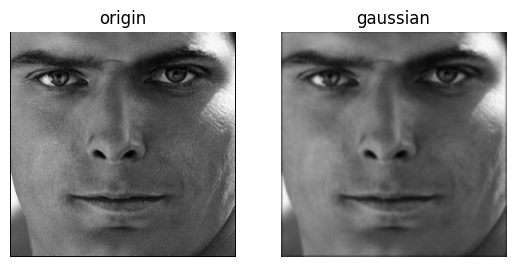

In [15]:

gaussian = cv2.GaussianBlur(img_fliter, (5,5), 1)
plt_show_bgr((img_fliter, gaussian), ('origin', 'gaussian'))

## 中值滤波
1. [Opencv之图像滤波：5.中值滤波(cv2.medianBlur)](https://blog.csdn.net/qq_49478668/article/details/123485382)

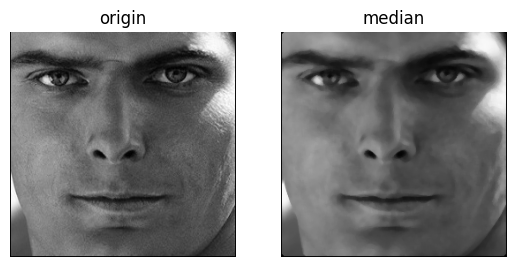

In [16]:
median = cv2.medianBlur(img_fliter, 5)
plt_show_bgr((img_fliter, median), ('origin', 'median'))

## 双边滤波
1. [Opencv之图像滤波：6.双边滤波(cv2.bilateralFilter)](https://blog.csdn.net/qq_49478668/article/details/123488527)

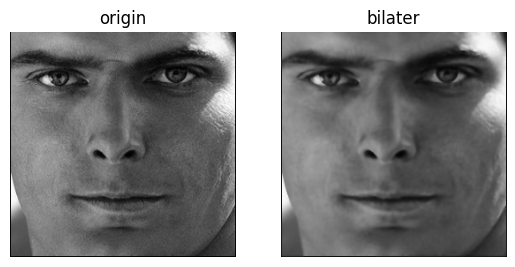

In [17]:
bilater = cv2.bilateralFilter(img_fliter, 5, 150, 150)
plt_show_bgr((img_fliter, bilater), ('origin', 'bilater'))

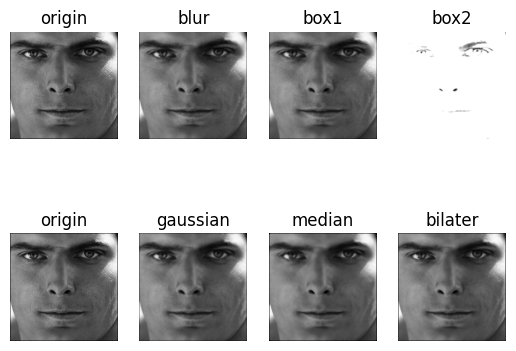

In [18]:

plt_show_bgr(
    (img_fliter, blur, box1, box2, img_fliter, gaussian, median, bilater),
    ('origin', 'blur', 'box1', 'box2', 'origin', 'gaussian', 'median', 'bilater')
)